In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
ENG_path = os.path.join('..', 'assets', 'ENG-Premier-League_22-23.csv' )

ENG_league = pd.read_csv(ENG_path, index_col= 'outcome_type')

In [50]:
ENG_league.head()

,league,season,game,id,period,minute,second,expanded_minute,type,team,...,is_shot,is_goal,related_event_id,related_player_id,blocked_x,blocked_y,card_type,game_id,team_id,player_id
outcome_type,,,,,,,,,,,,,,,,,,,,,
Successful,ENG-Premier League,2223,2022-08-05 Crystal Palace-Arsenal,2442202525,PreMatch,0,0.0,0,FormationSet,Crystal Palace,...,NaN,NaN,NaN,NaN,NaN,NaN,None,1640674,162,NaN
Successful,ENG-Premier League,2223,2022-08-05 Crystal Palace-Arsenal,2442202541,PreMatch,0,0.0,0,FormationSet,Arsenal,...,NaN,NaN,NaN,NaN,NaN,NaN,None,1640674,13,NaN
Successful,ENG-Premier League,2223,2022-08-05 Crystal Palace-Arsenal,2442234161,FirstHalf,0,0.0,0,Start,Crystal Palace,...,NaN,NaN,NaN,NaN,NaN,NaN,None,1640674,162,NaN
Successful,ENG-Premier League,2223,2022-08-05 Crystal Palace-Arsenal,2442234163,FirstHalf,0,0.0,0,Start,Arsenal,...,NaN,NaN,NaN,NaN,NaN,NaN,None,1640674,13,NaN
Successful,ENG-Premier League,2223,2022-08-05 Crystal Palace-Arsenal,2442234185,FirstHalf,0,0.0,0,Pass,Crystal Palace,...,NaN,NaN,NaN,NaN,NaN,NaN,None,1640674,162,332403.0


In [6]:
ENG_league['type'].unique()

array(['FormationSet', 'Start', 'Pass', 'Aerial', 'BallRecovery',
       'Dispossessed', 'Tackle', 'BlockedPass', 'BallTouch', 'Foul',
       'Interception', 'Challenge', 'TakeOn', 'SavedShot', 'Save',
       'MissedShots', 'Clearance', 'OffsidePass', 'OffsideProvoked',
       'KeeperPickup', 'CornerAwarded', 'Goal', 'OffsideGiven', 'Punch',
       'Card', 'End', 'Claim', 'SubstitutionOff', 'SubstitutionOn',
       'FormationChange', 'ShieldBallOpp', 'PenaltyFaced',
       'KeeperSweeper', 'Smother', 'ShotOnPost', 'ChanceMissed',
       'GoodSkill', 'Error', 'CrossNotClaimed'], dtype=object)

In [7]:
#Goals scored by team

goal_per_team=ENG_league[ENG_league['type'] == 'Goal']['team'].value_counts()

In [8]:
#Missed shots by team

missed_shots_per_team=ENG_league[ENG_league['type'] == 'MissedShots']['team'].value_counts()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Number of goals')

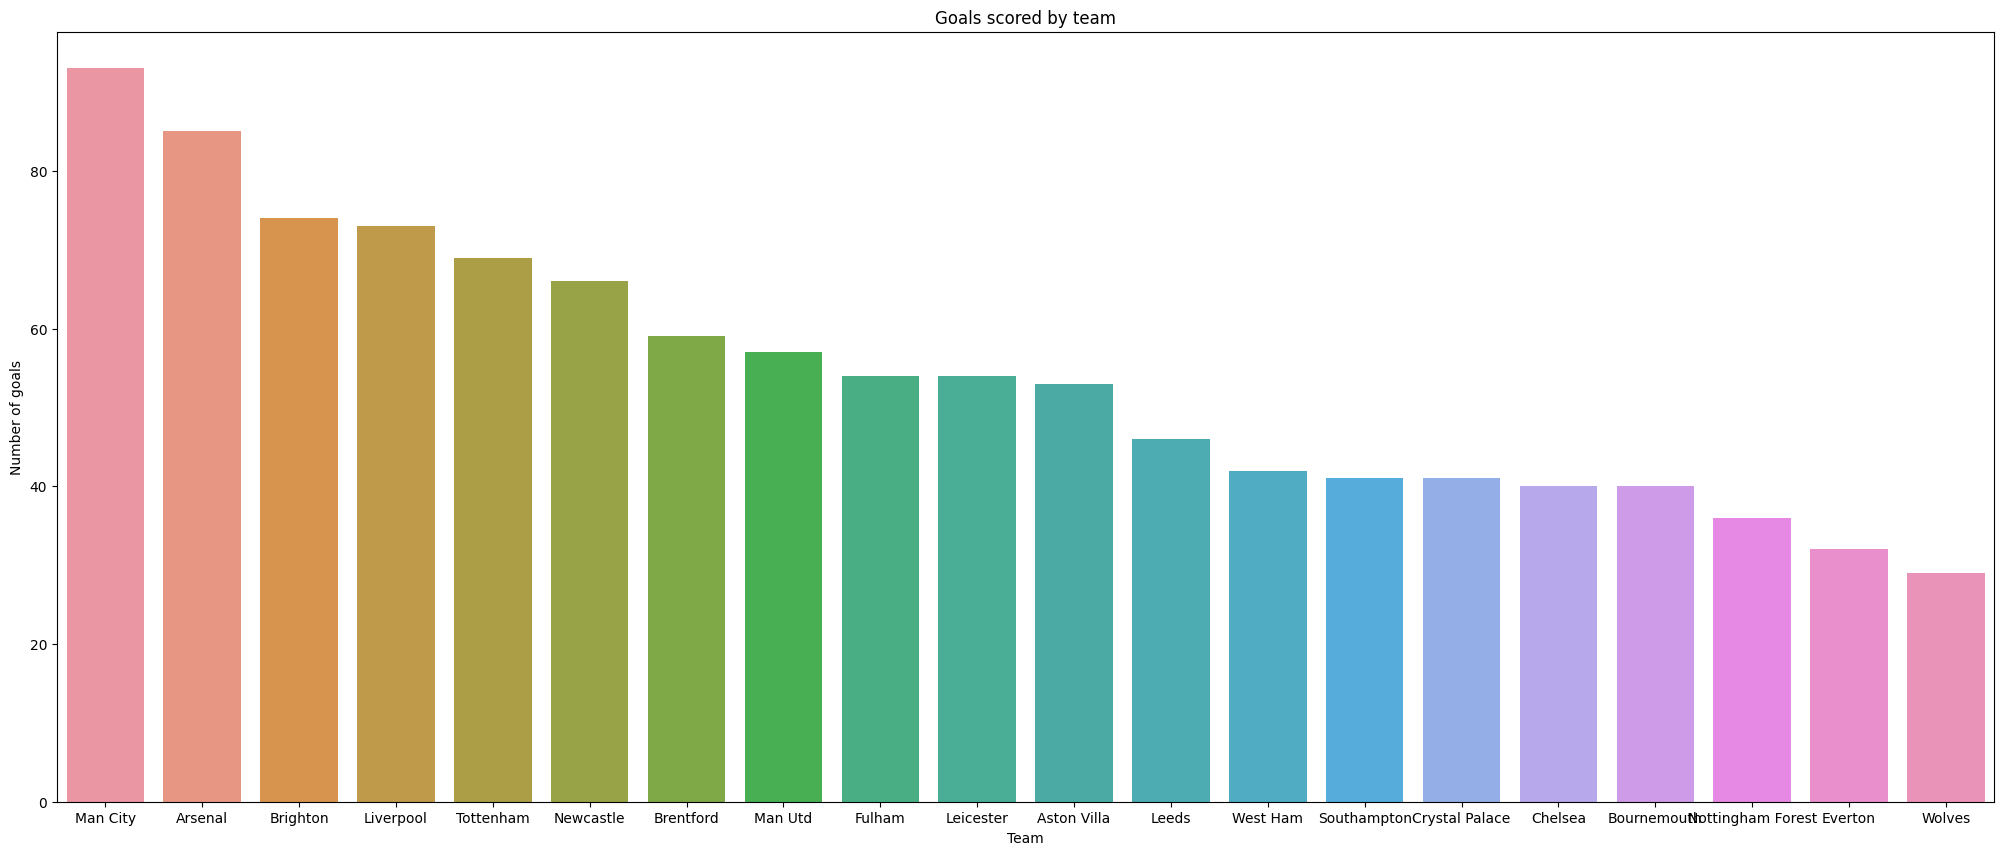

In [15]:
#Plot the goals scored by team and missed shots by team without subplots

plt.figure(figsize=(55,10))
plt.subplot(1,2,1)
sns.barplot(x=goal_per_team.index, y=goal_per_team.values)
plt.title('Goals scored by team')
plt.xlabel('Team')
plt.ylabel('Number of goals')


Text(0, 0.5, 'Number of goals')

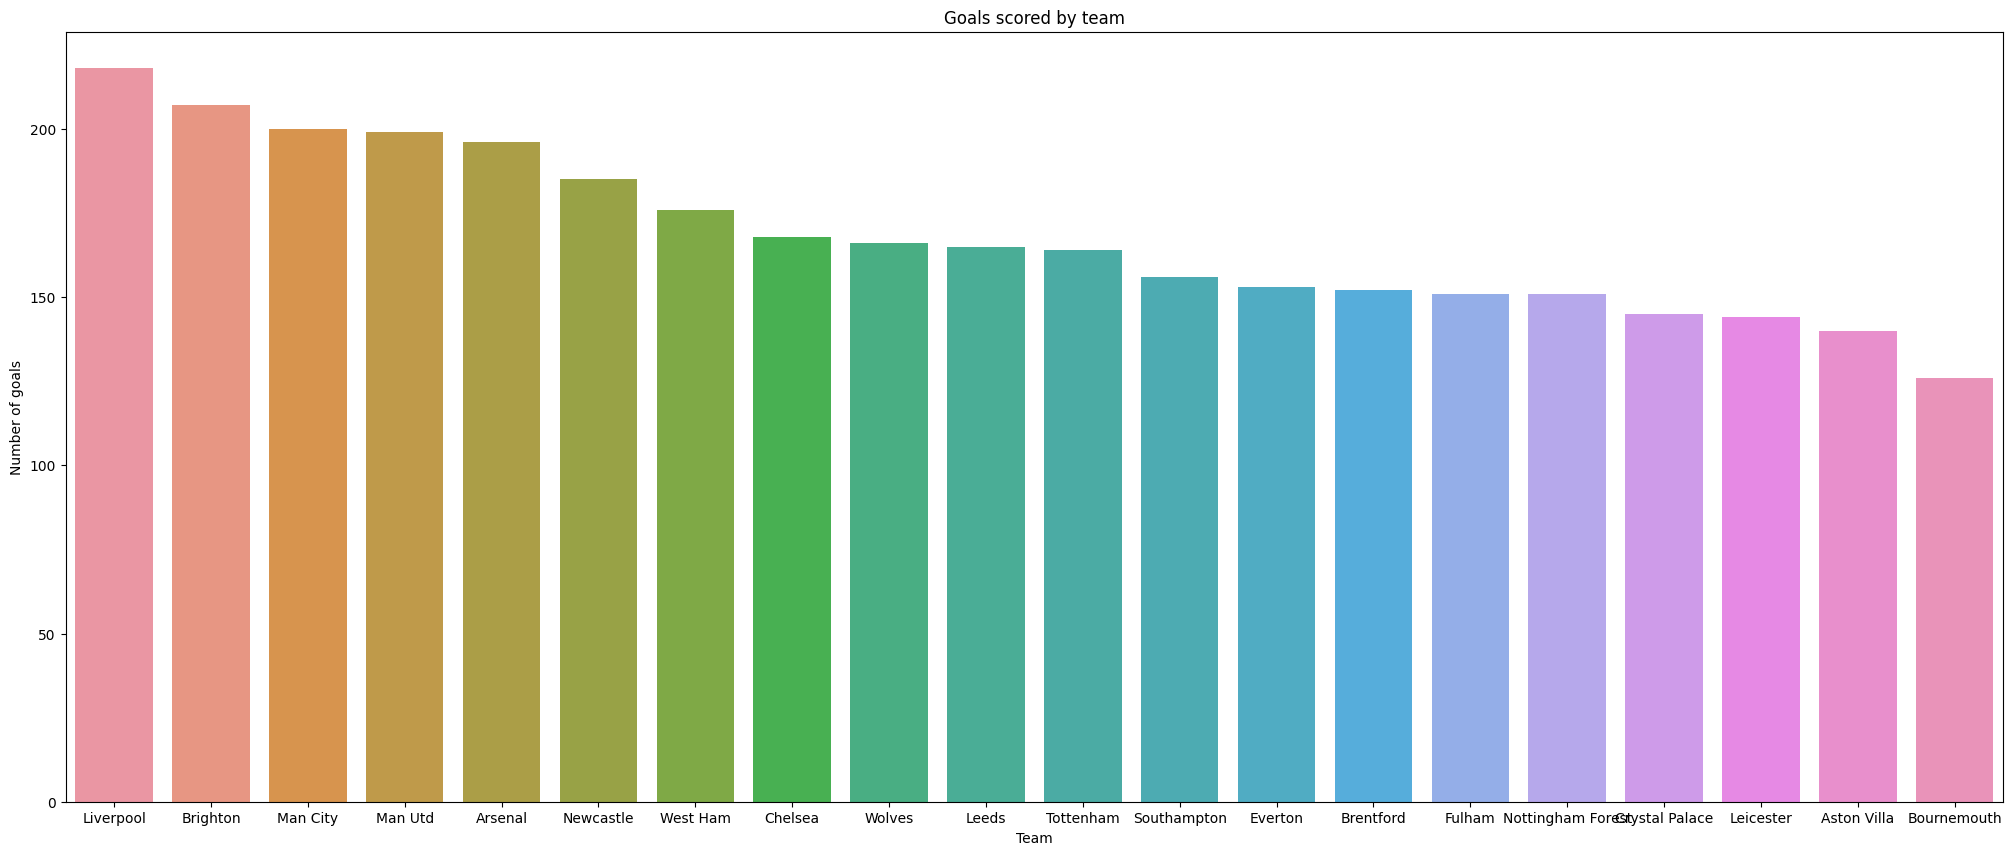

In [16]:
plt.figure(figsize=(55,10))
plt.subplot(1,2,1)
sns.barplot(x=missed_shots_per_team.index, y=missed_shots_per_team.values)
plt.title('Goals scored by team')
plt.xlabel('Team')
plt.ylabel('Number of goals')

Text(0, 0.5, 'Number of goals')

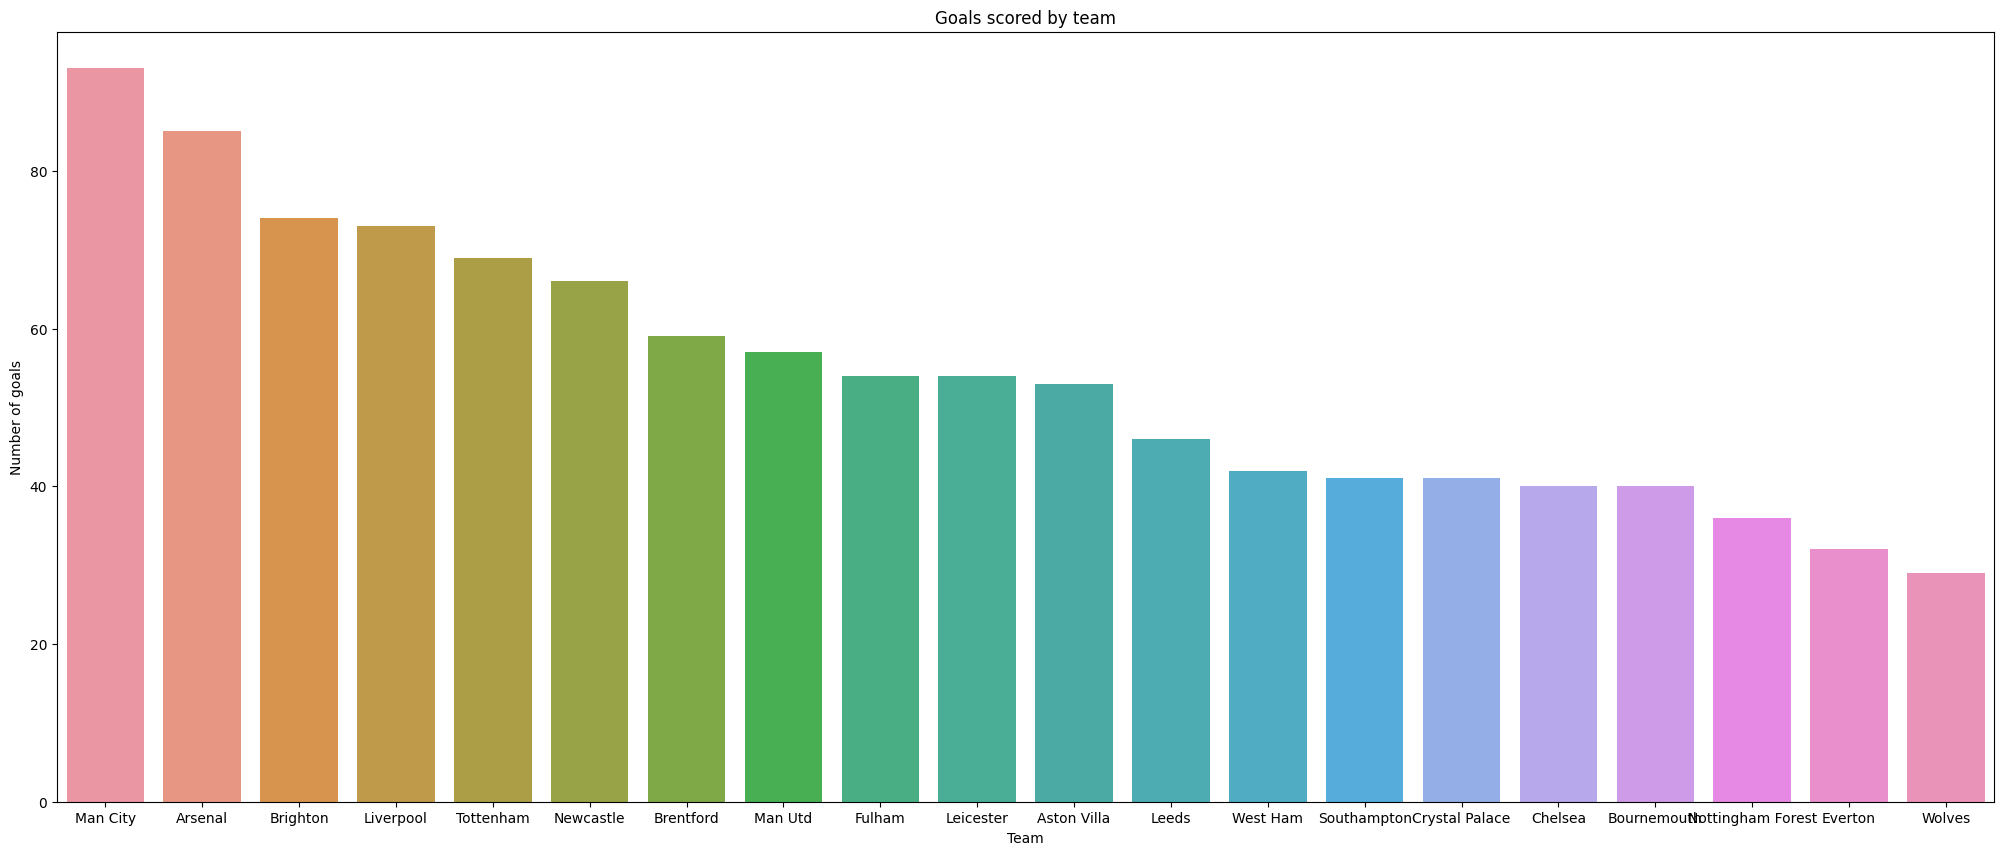

In [26]:
#Side by side subplots of goals scored by team and missed shots by team

plt.figure(figsize=(55,10))
plt.subplot(1,2,1)
sns.barplot(x=goal_per_team.index, y=goal_per_team.values)
plt.title('Goals scored by team')
plt.xlabel('Team')
plt.ylabel('Number of goals')



Text(645.8472222222223, 0.5, 'Number of goals')

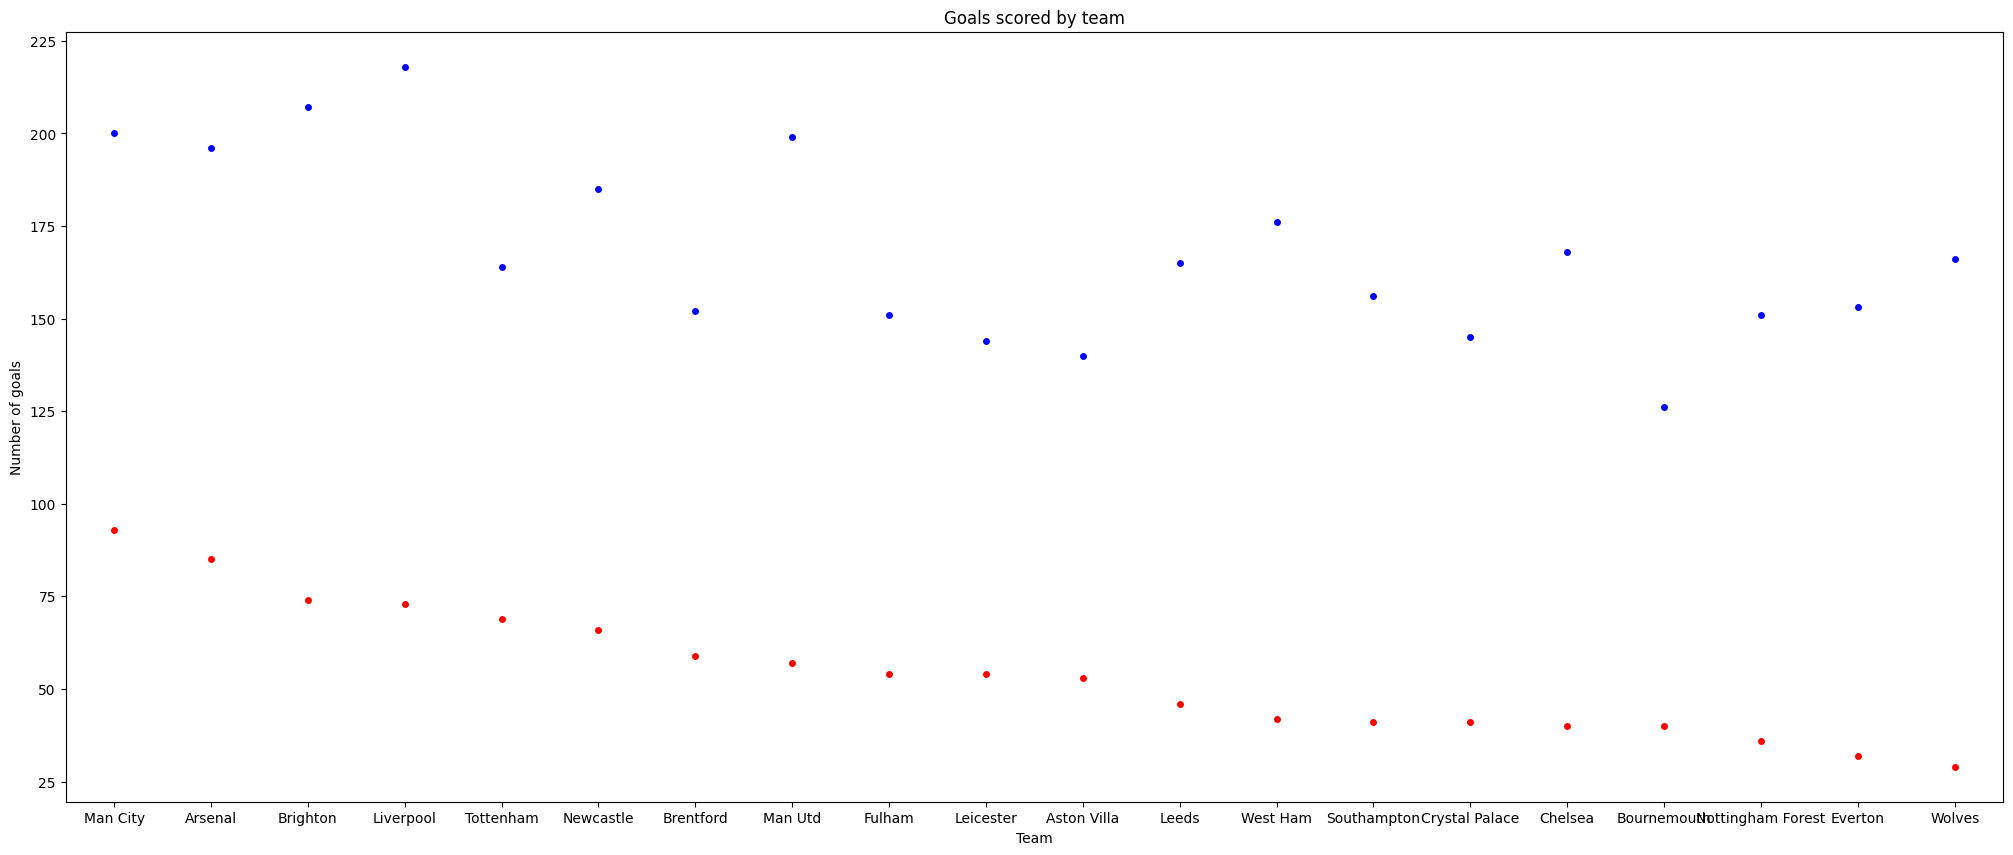

In [32]:
#Swarmplot of goals scored by team and missed shots by team with 2 different colors

plt.figure(figsize=(55,10))
plt.subplot(1,2,1)
sns.swarmplot(x=goal_per_team.index, y=goal_per_team.values, color='red')
sns.swarmplot(x=missed_shots_per_team.index, y=missed_shots_per_team.values, color='blue')
plt.title('Goals scored by team')
plt.xlabel('Team')
plt.ylabel('Number of goals')



In [35]:
#Let's now do a lmplot of goals scored by team and missed shots by team
#First we'll combine the two series into a dataframe

goals_missed_shots_df = pd.concat([goal_per_team, missed_shots_per_team], axis=1)
goals_missed_shots_df.columns = ['goals', 'missed_shots']
goals_missed_shots_df.head()



,goals,missed_shots
Man City,93,200
Arsenal,85,196
Brighton,74,207
Liverpool,73,218
Tottenham,69,164


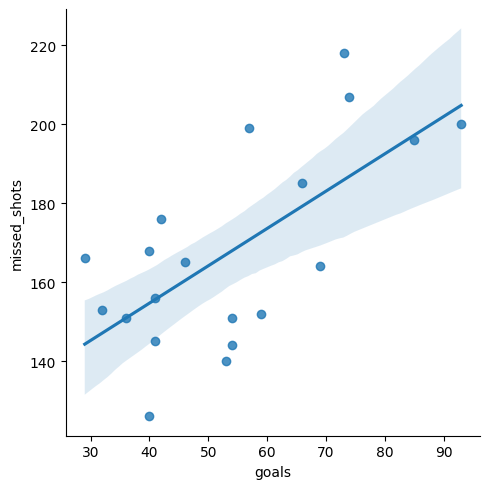

In [37]:
sns.lmplot(x='goals', y='missed_shots', data=goals_missed_shots_df)

In [38]:
conversion_rate = goals_missed_shots_df['goals'] / goals_missed_shots_df['missed_shots']

<Axes: >

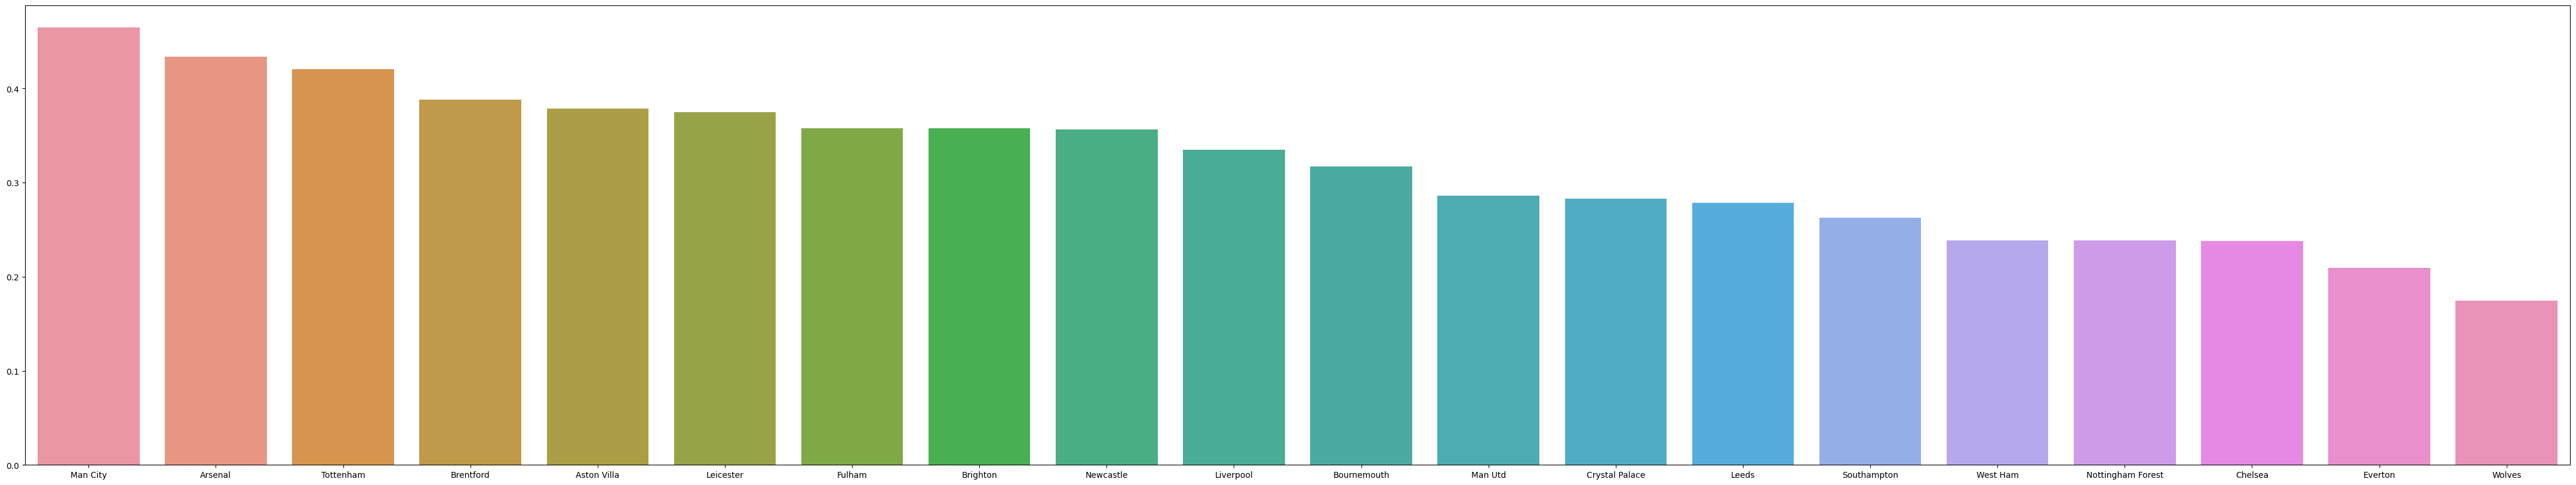

In [43]:
conversion_rate=conversion_rate.sort_values(ascending=False)

plt.figure(figsize=(55,10))
sns.barplot(x=conversion_rate.index, y=conversion_rate.values)


In [63]:
#Let's make a simple pass completion rate
passes=ENG_league[ENG_league['type'] == 'Pass']['team'].value_counts()
blocked_passes=ENG_league[ENG_league['type'] == 'BlockedPass']['team'].value_counts()

pass_completion_rate = passes / blocked_passes

<Axes: >

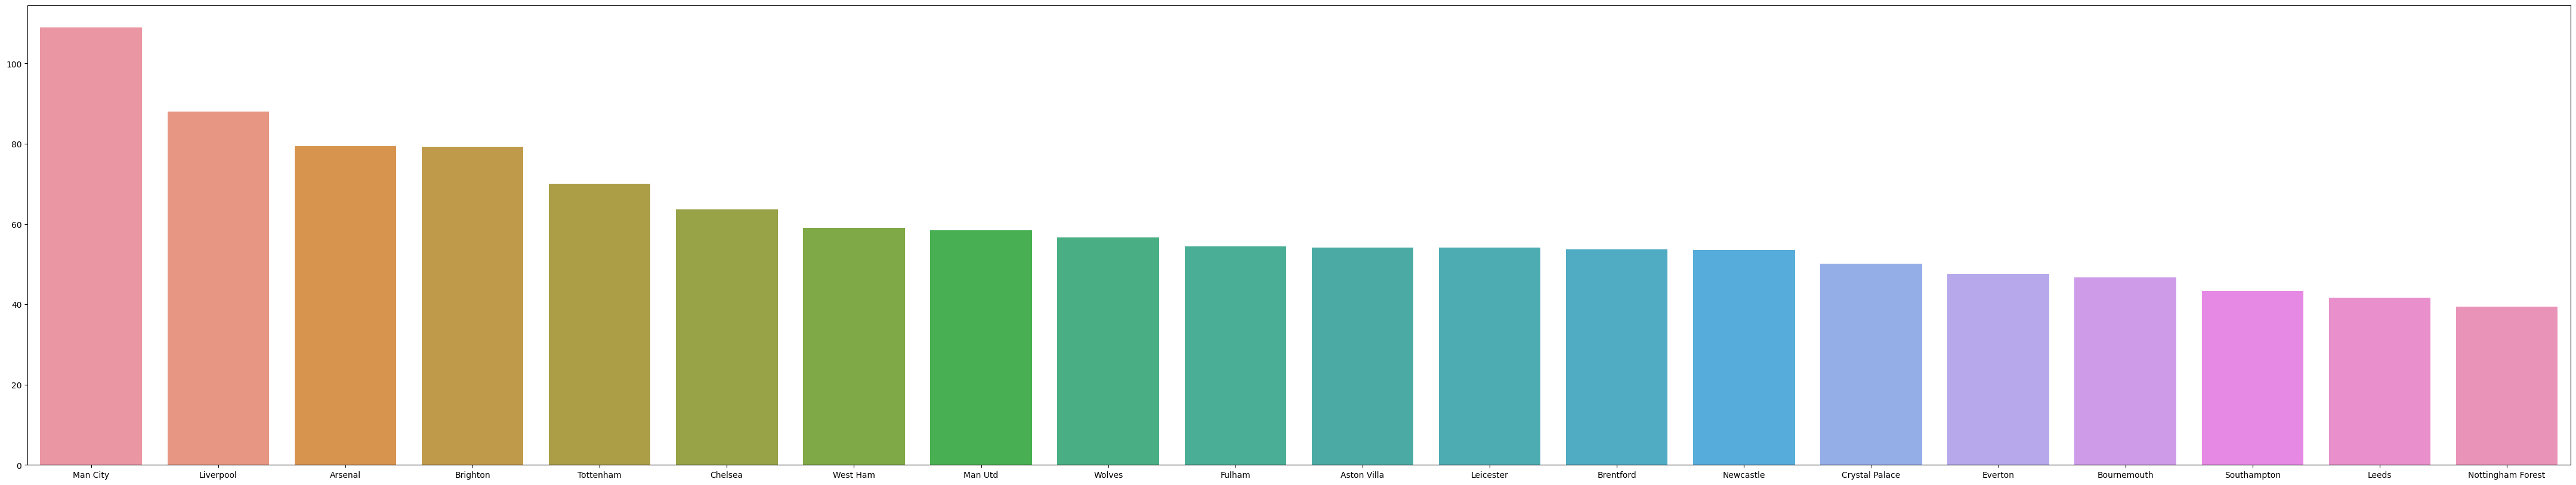

In [64]:
pass_completion_rate=pass_completion_rate.sort_values(ascending=False)

plt.figure(figsize=(55,10))
sns.barplot(x=pass_completion_rate.index, y=pass_completion_rate.values)



<Axes: >

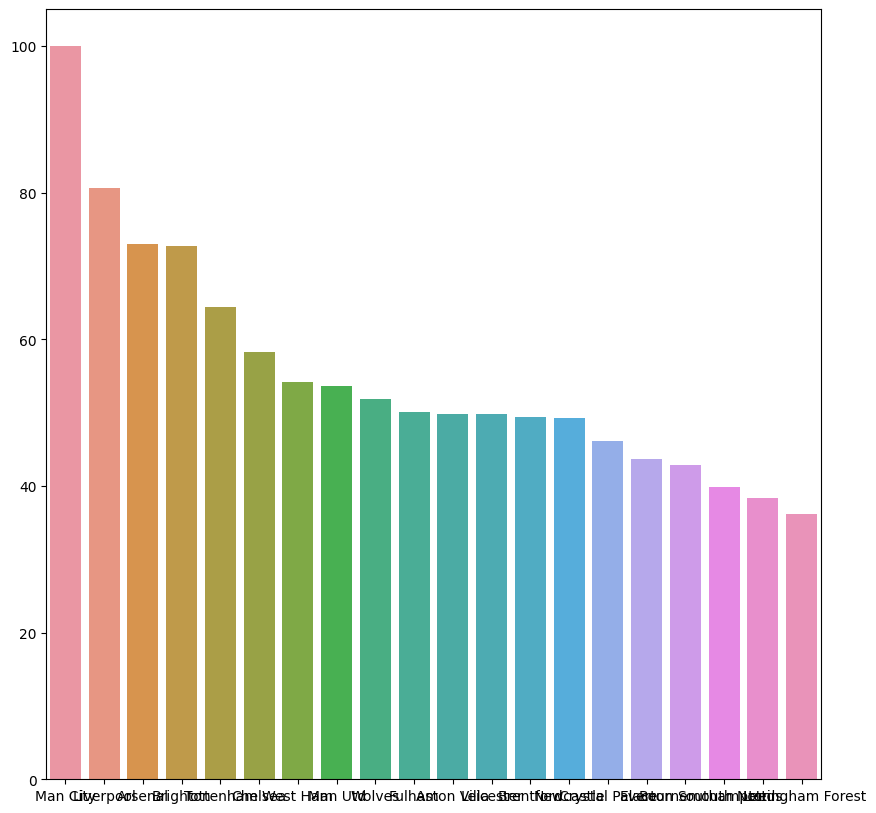

In [69]:
#Let's do a recap of the above and rename the variables to make it easier to understand

columns = ['Goal', 'MissedShots', 'Pass', 'BlockedPass']

#Goals scored by team

goal_per_team=ENG_league[ENG_league['type'] == 'Goal']['team'].value_counts()

#Missed shots by team

missed_shots_per_team=ENG_league[ENG_league['type'] == 'MissedShots']['team'].value_counts()

#Passes by team

passes=ENG_league[ENG_league['type'] == 'Pass']['team'].value_counts()

#Blocked passes by team

blocked_passes=ENG_league[ENG_league['type'] == 'BlockedPass']['team'].value_counts()

#Combining the above into a dataframe

goals_missed_shots_df = pd.concat([goal_per_team, missed_shots_per_team, passes, blocked_passes], axis=1)

#Renaming the columns

goals_missed_shots_df.columns = ['goals', 'missed_shots', 'passes', 'blocked_passes']

#Creating a conversion rate column

goals_missed_shots_df['conversion_rate'] = goals_missed_shots_df['goals'] / goals_missed_shots_df['missed_shots']

#Creating a pass completion rate column

goals_missed_shots_df['pass_completion_rate'] = goals_missed_shots_df['passes'] / goals_missed_shots_df['blocked_passes']

#Sorting the dataframe by conversion rate

goals_missed_shots_df=goals_missed_shots_df.sort_values(by='conversion_rate', ascending=False)

#And finally make a little Series with each team, combining the conversion rate and pass completion rate
#We'll take both values and simply add them together

#And take the highest result and make it over 100
#Adjusting the rest of the values accordingly

offensive_rating = goals_missed_shots_df['conversion_rate'] + goals_missed_shots_df['pass_completion_rate']

offensive_rating = offensive_rating * 100 / offensive_rating.max()

offensive_rating=offensive_rating.sort_values(ascending=False)

plt.figure(figsize=(55,10))
sns.barplot(x=offensive_rating.index, y=offensive_rating.values)



type_arr=['FormationSet', 'Start', 'Pass', 'Aerial', 'BallRecovery',
       'Dispossessed', 'Tackle', 'BlockedPass', 'BallTouch', 'Foul',
       'Interception', 'Challenge', 'TakeOn', 'SavedShot', 'Save',
       'MissedShots', 'Clearance', 'OffsidePass', 'OffsideProvoked',
       'KeeperPickup', 'CornerAwarded', 'Goal', 'OffsideGiven', 'Punch',
       'Card', 'End', 'Claim', 'SubstitutionOff', 'SubstitutionOn',
       'FormationChange', 'ShieldBallOpp', 'PenaltyFaced',
       'KeeperSweeper', 'Smother', 'ShotOnPost', 'ChanceMissed',
       'GoodSkill', 'Error', 'CrossNotClaimed']

SubstitutionOn
SubstitutionOff
FormationChange
OffsideGiven
OffsidePass
OffsideProvoked

Card
Foul


<Axes: title={'center': 'Defensive rating by team'}>

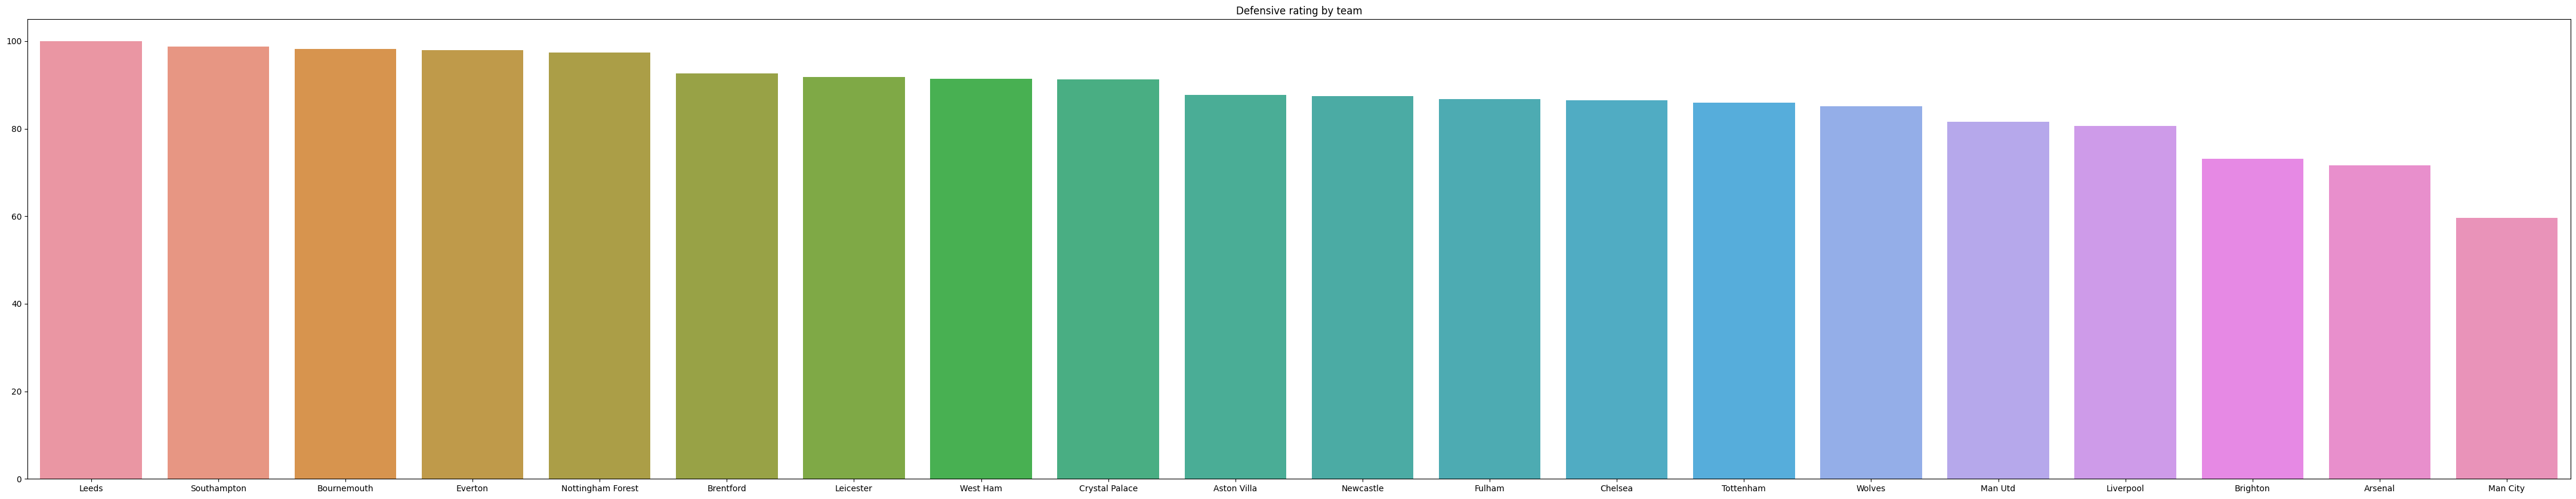

In [82]:
#Let's now do a defensive rating
#The variables we'll use are:
#Tackles
#Interceptions
#Clearances
#Blocked shots
#Saves

#get all tackles made by a team

team_name = 'Manchester City'

#tackles for team_name

tackles=ENG_league[ENG_league['type'] == 'Tackle']['team'].loc[team_name].value_counts()

#Tackles by team

tackles=ENG_league[ENG_league['type'] == 'Tackle']['team'].value_counts()

#We'll adjust the tackles as per the same method as we did with the offensive rating

tackles=tackles * 100 / tackles.max()


#Interceptions by team

interceptions=ENG_league[ENG_league['type'] == 'Interception']['team'].value_counts()

interceptions=interceptions * 100 / interceptions.max()

#Clearances by team

clearances=ENG_league[ENG_league['type'] == 'Clearance']['team'].value_counts()

clearances=clearances * 100 / clearances.max()

#Blocked shots by team

KeeperPickup=ENG_league[ENG_league['type'] == 'KeeperPickup']['team'].value_counts()

KeeperPickup=KeeperPickup * 100 / KeeperPickup.max()

#Combining the above into a dataframe

defensive_df = pd.concat([tackles, interceptions, clearances, KeeperPickup], axis=1)

#Renaming the columns

defensive_df.columns = ['tackles', 'interceptions', 'clearances', 'KeeperPickup']

#Creating a defensive rating column

defensive_df['defensive_rating'] = defensive_df['tackles'] + defensive_df['interceptions'] + defensive_df['clearances'] + defensive_df['KeeperPickup']

#Sorting the dataframe by defensive rating

defensive_df=defensive_df.sort_values(by='defensive_rating', ascending=False)

defensive_df = defensive_df * 100 / defensive_df.max()

# # #Let's plot this now

# plt.figure(figsize=(55,10))
# plt.title('Defensive rating by team')
# sns.barplot(x=defensive_df.index, y=defensive_df['defensive_rating'].values)


<Axes: title={'center': 'Hustle rating by team'}>

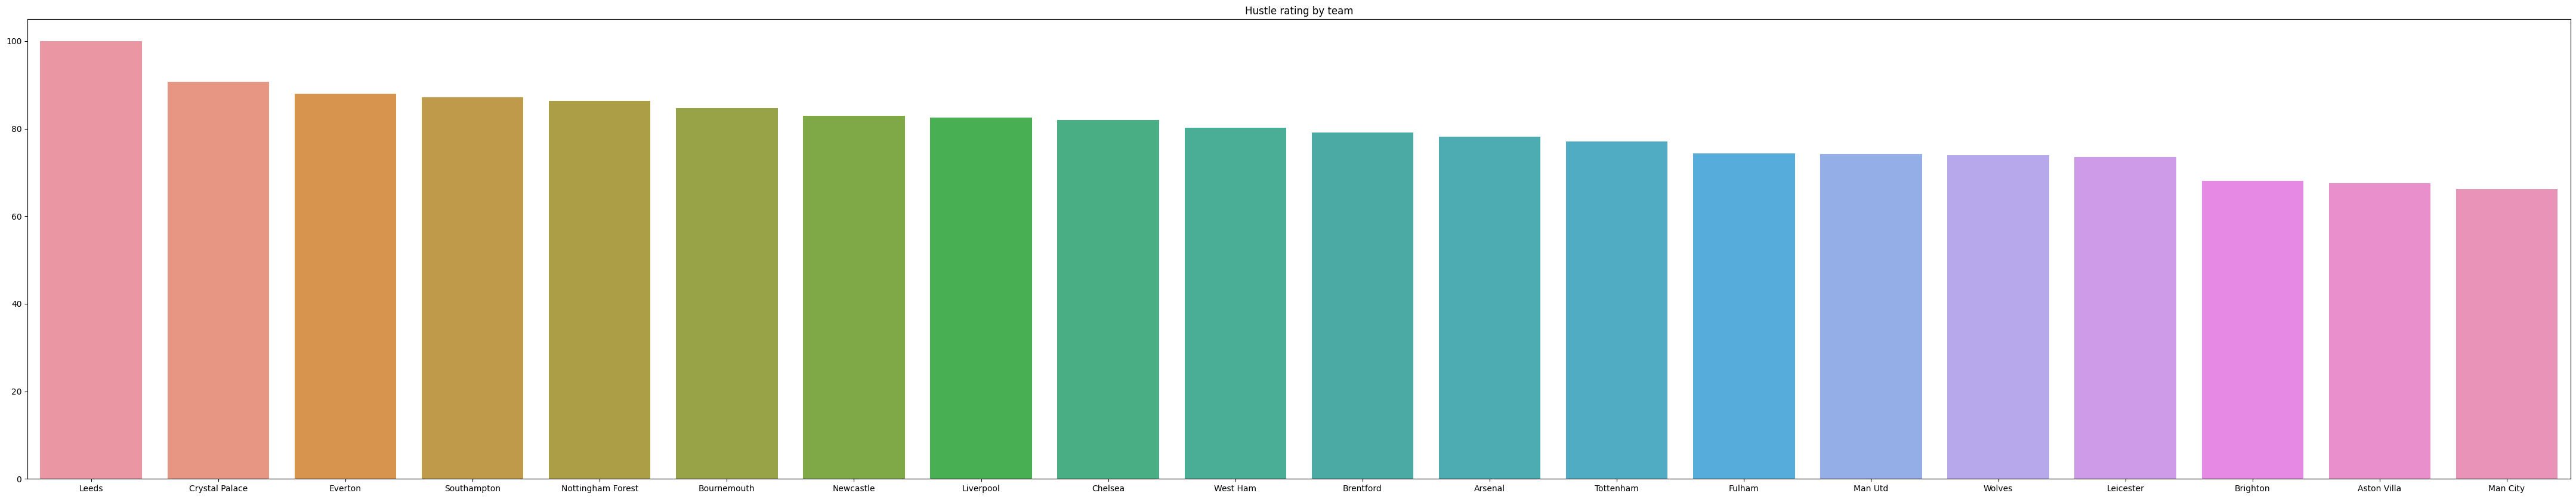

In [83]:
#Let's make a 'Hustle' rating

#The variables we'll use are:
#Recovered balls
#Aerials won
#Dribbles
#Punches

#Recovered balls by team

RecoveredBalls=ENG_league[ENG_league['type'] == 'BallRecovery']['team'].value_counts()

#We'll adjust the tackles as per the same method as we did with the offensive rating

RecoveredBalls=RecoveredBalls * 100 / RecoveredBalls.max()

#Aerials won by team

AerialsWon=ENG_league[ENG_league['type'] == 'Aerial']['team'].value_counts()

AerialsWon=AerialsWon * 100 / AerialsWon.max()

#BallTouch by team

BallTouch=ENG_league[ENG_league['type'] == 'BallTouch']['team'].value_counts()

BallTouch=BallTouch * 100 / BallTouch.max()

#Punches by team

Punches=ENG_league[ENG_league['type'] == 'Punch']['team'].value_counts()

Punches=Punches * 100 / Punches.max()

#Combining the above into a dataframe

hustle_df = pd.concat([RecoveredBalls, AerialsWon, BallTouch, Punches], axis=1)

#Renaming the columns

hustle_df.columns = ['RecoveredBalls', 'AerialsWon', 'BallTouch', 'Punches']

#Creating a hustle rating column

hustle_df['hustle_rating'] = hustle_df['RecoveredBalls'] + hustle_df['AerialsWon'] + hustle_df['BallTouch'] + hustle_df['Punches']

#Sorting the dataframe by hustle rating

hustle_df=hustle_df.sort_values(by='hustle_rating', ascending=False)

hustle_df = hustle_df * 100 / hustle_df.max()

# # #Let's plot this now

plt.figure(figsize=(55,10))
plt.title('Hustle rating by team')
sns.barplot(x=hustle_df.index, y=hustle_df['hustle_rating'].values)


<Axes: title={'center': 'Strategy rating by team'}>

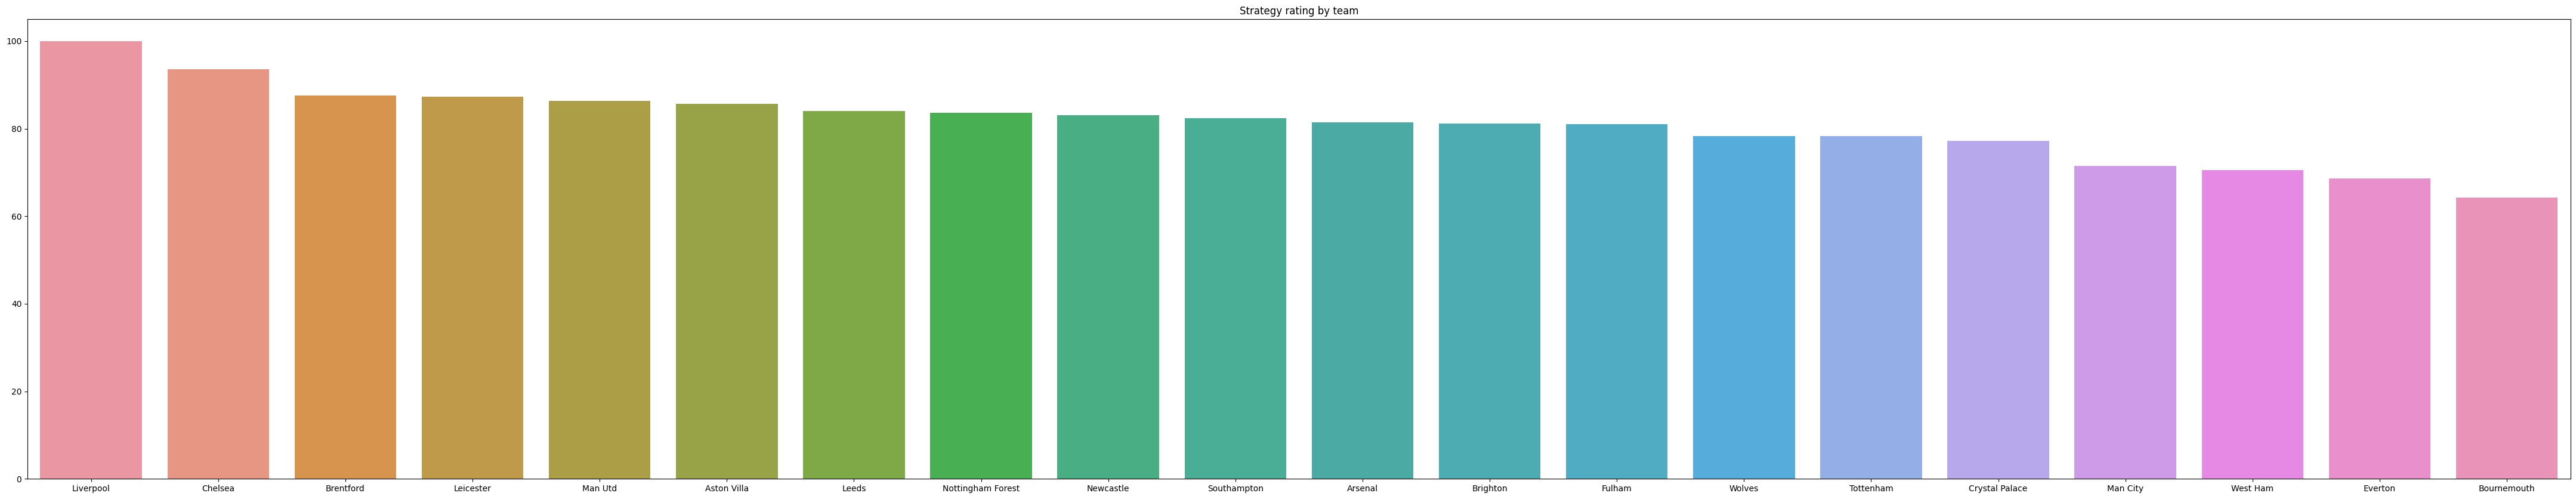

In [84]:
#Let's make a Strategy rating

#The variables we'll use are:
# SubstitutionOn
# SubstitutionOff
# FormationChange
# OffsideGiven
# OffsidePass
# OffsideProvoked

#SubstitutionOn by team

SubstitutionOn=ENG_league[ENG_league['type'] == 'SubstitutionOn']['team'].value_counts()

#We'll adjust the tackles as per the same method as we did with the offensive rating

SubstitutionOn=SubstitutionOn * 100 / SubstitutionOn.max()

#SubstitutionOff by team

SubstitutionOff=ENG_league[ENG_league['type'] == 'SubstitutionOff']['team'].value_counts()

SubstitutionOff=SubstitutionOff * 100 / SubstitutionOff.max()

#FormationChange by team

FormationChange=ENG_league[ENG_league['type'] == 'FormationChange']['team'].value_counts()

FormationChange=FormationChange * 100 / FormationChange.max()

#OffsideGiven by team

OffsideGiven=ENG_league[ENG_league['type'] == 'OffsideGiven']['team'].value_counts()

OffsideGiven=OffsideGiven * 100 / OffsideGiven.max()

#OffsidePass by team

OffsidePass=ENG_league[ENG_league['type'] == 'OffsidePass']['team'].value_counts()

OffsidePass=OffsidePass * 100 / OffsidePass.max()

#OffsideProvoked by team

OffsideProvoked=ENG_league[ENG_league['type'] == 'OffsideProvoked']['team'].value_counts()

OffsideProvoked=OffsideProvoked * 100 / OffsideProvoked.max()


#Combining the above into a dataframe

strategy_df = pd.concat([SubstitutionOn, SubstitutionOff, FormationChange, OffsideGiven, OffsidePass, OffsideProvoked], axis=1)

#Renaming the columns

strategy_df.columns = ['SubstitutionOn', 'SubstitutionOff', 'FormationChange', 'OffsideGiven', 'OffsidePass', 'OffsideProvoked']

#Creating a strategy rating column

strategy_df['strategy_rating'] = strategy_df['SubstitutionOn'] + strategy_df['SubstitutionOff'] + strategy_df['FormationChange'] + strategy_df['OffsideGiven'] + strategy_df['OffsidePass'] + strategy_df['OffsideProvoked']

#Sorting the dataframe by strategy rating

strategy_df=strategy_df.sort_values(by='strategy_rating', ascending=False)

strategy_df = strategy_df * 100 / strategy_df.max()

# # #Let's plot this now

plt.figure(figsize=(55,10))

plt.title('Strategy rating by team')

sns.barplot(x=strategy_df.index, y=strategy_df['strategy_rating'].values)


<Axes: title={'center': 'Discipline rating by team'}>

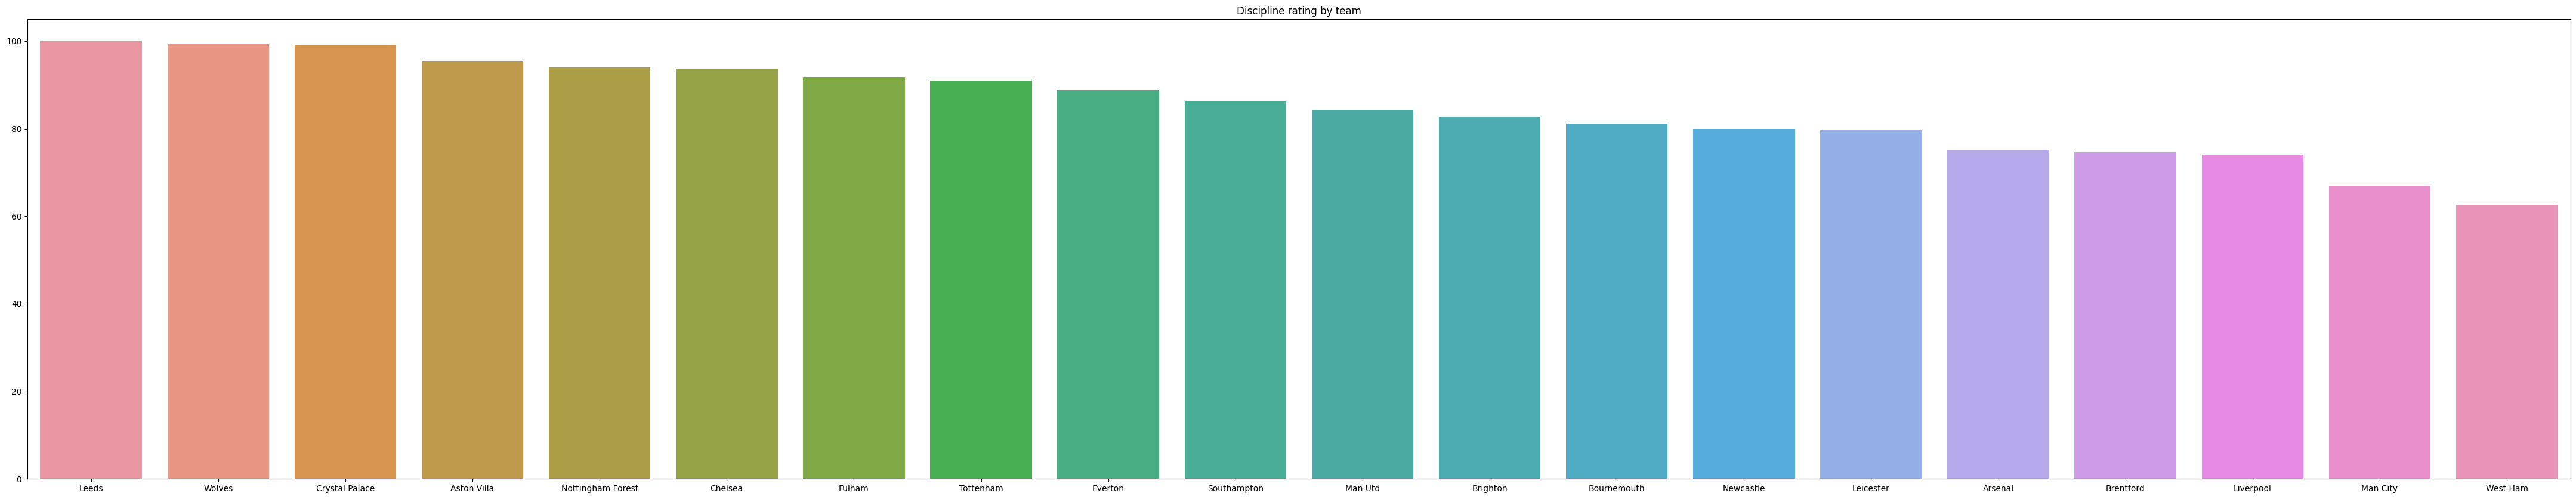

In [85]:
#Finally, let's make a 'Discipline' rating

#The variables we'll use are:
# Card
# Foul


#Card by team

Card=ENG_league[ENG_league['type'] == 'Card']['team'].value_counts()

#We'll adjust the tackles as per the same method as we did with the offensive rating

Card=Card * 100 / Card.max()

#Foul by team

Foul=ENG_league[ENG_league['type'] == 'Foul']['team'].value_counts()

Foul=Foul * 100 / Foul.max()

#Combining the above into a dataframe

discipline_df = pd.concat([Card, Foul], axis=1)

#Renaming the columns

discipline_df.columns = ['Card', 'Foul']

#Creating a discipline rating column

discipline_df['discipline_rating'] = discipline_df['Card'] + discipline_df['Foul']

#Sorting the dataframe by discipline rating

discipline_df=discipline_df.sort_values(by='discipline_rating', ascending=False)

discipline_df = discipline_df * 100 / discipline_df.max()

# # #Let's plot this now

plt.figure(figsize=(55,10))

plt.title('Discipline rating by team')

sns.barplot(x=discipline_df.index, y=discipline_df['discipline_rating'].values)

In [10]:
team_name = 'Manchester City'

# all tackles made by Manchester City

tackles=ENG_league[ENG_league['type'] == 'Tackle' and ENG_league['team'] == team_name].value_counts()

# tackles=ENG_league[ENG_league['type'] == 'Tackle']['team'].value_counts()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [10]:
Card = ENG_league.loc[(ENG_league['type'] == 'Card') & (ENG_league.index == 'Successful') & (ENG_league['team'] == 'Man City')].index.value_counts()
print(Card[0])


47
